In [1]:
import os
os.chdir("../")

from electra_package.modules_main import *
# from old_modules.modules_fit import *
import json
import plotly.graph_objects as go
import numpy as np
import os
import pandas as pd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Carga de dataframes con clasificación de ajuste posible/no posible.

In [2]:
pth=os.getcwd()
pthreg=pth+'/../data/lineas_completas/REG.csv'
reg_posible=pd.read_csv(pthreg)
pthvdi=pth+'/../data/lineas_completas/VDI.csv'
vdi_posible=pd.read_csv(pthvdi)
pthxin=pth+'/../data/lineas_completas/XIN.csv'
xin_posible=pd.read_csv(pthxin)
reg=reg_posible.loc[reg_posible['Reconstrucción']=='Posible','Vano']
vdi=vdi_posible.loc[vdi_posible['Reconstrucción']=='Posible','Vano']
xin=xin_posible.loc[xin_posible['Reconstrucción']=='Posible','Vano']

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu-deduce/Projects/electra-ia/../data/lineas_completas/REG.csv'

Generación de ajustes

In [3]:
# from catenaria.notebooks.old_modules.modules_fit import *
import json
import os

pathdata2 = "./data/lineas_completas/XIN803.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)

fulld=[data[i]['ID_VANO'] for i in range(len(data[:110]))]
data, rmses, maxes, correlations=fit_plot_vano_group_2(data,sublist=fulld,plot_filter='good_fit',init=0,end=110,save=True,label='REG')#len(fulld)
#'bad_line_number', "bad_backing", bad_cluster, bad_line_number, bad_line_orientation, bad_fit, good_fit, 


Processing Vano 0

Reference G_13645821_13645987
First time 0.018181800842285156
Rotating vano
Cropping conductor
Analyzing conductor configuration
Third time 0.6978600025177002
Number of lines: 3
Fourth time 0.0023505687713623047
Starting fit
Prefit data shape (3, 9313)
Applying spectral clustering
clustering time 1 11.999432563781738
clustering time 2 0.0018117427825927734
clustering time 12.001845121383667
Fifth time 12.010298728942871
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.19364573788005293, 0.9247474261740904
Fit Pearson R and Fit Spearman R for z coordinate: 0.9811924475411595, 0.9884116816751826
RmeanSE and RmaxSE error for z coordinate: 0.1875804140711547, 0.9125148215937346
Fit Pearson R and Fit Spearman R for z coordinate: 0.9823725329484035, 0.9935841747972765
RmeanSE and RmaxSE error for z coordinate: 0.20323769054675808, 0.9606702244397436
Fit Pearson R and Fit Spearman R for z coordinate: 0.9792824013002415, 0.9929447377029864
Sixth time 0

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.9195013046264648
clustering time 2 0.002457141876220703
clustering time 1.923110008239746
Fifth time 1.9286208152770996
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.5779160928195463, 0.8855188397194309
Fit Pearson R and Fit Spearman R for z coordinate: 0.8160961893093482, 0.8088537682272616
RmeanSE and RmaxSE error for z coordinate: 0.0682513479388697, 0.20373252345677284
Fit Pearson R and Fit Spearman R for z coordinate: 0.997668158008787, 0.9897334282648055
RmeanSE and RmaxSE error for z coordinate: 0.6958448753280067, 2.430467431973435
Fit Pearson R and Fit Spearman R for z coordinate: 0.71819211201485, 0.6901871517073401
Sixth time 0.019025087356567383
Evaluating fit
Seventh time 0.005730152130126953
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13615863_13645824"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.31%"},"Error polil\u00ednea":{"0":1043436.20

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
print(f"Mean RMSE and mean RmaxSE: {np.array(rmses).mean().mean()}, {np.array(maxes).mean().mean()}")
print(f"Mean correlation R Pearson and Spearman: {np.array(correlations)[:,0].mean().mean()}, {np.array(correlations)[:,1].mean().mean()}")

Mean RMSE and mean RmaxSE: 0.44582288572916867, 0.9813628323846194
Mean correlation R Pearson and Spearman: 0.7830621825810536, 0.7681544447402449


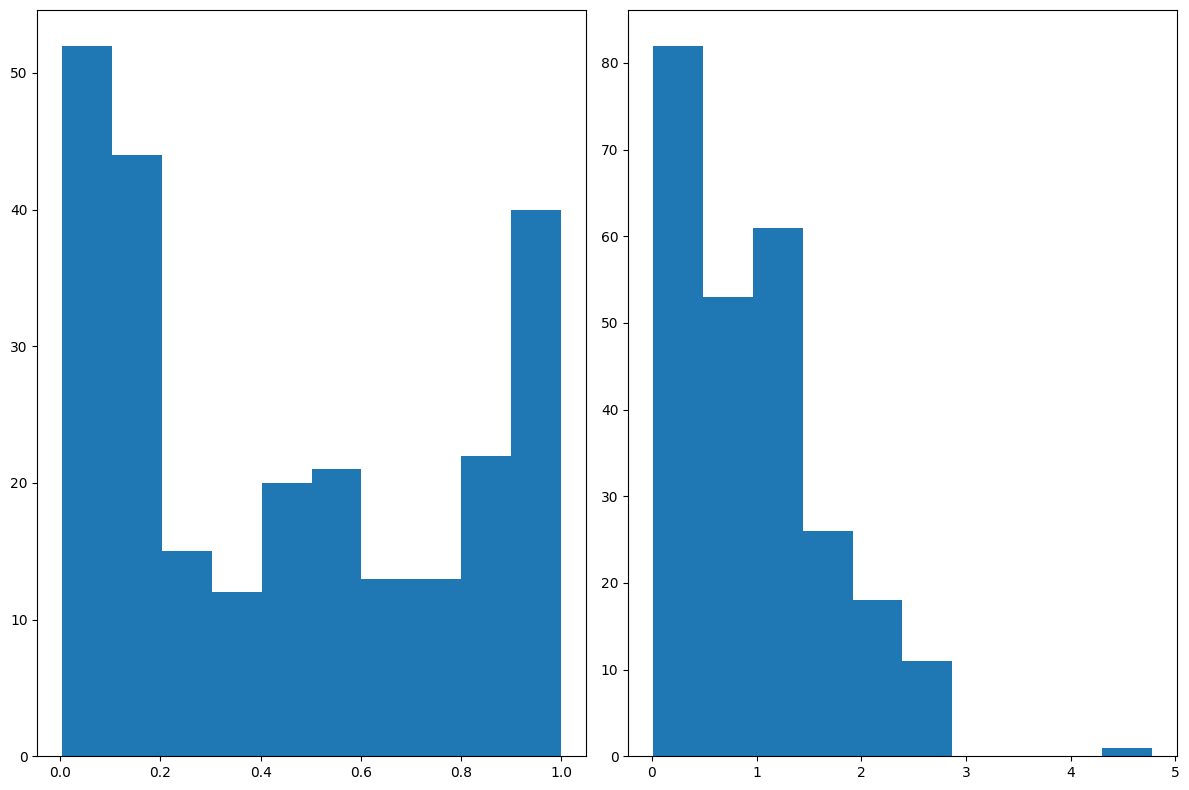

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.hist(np.array(rmses).flatten())
plt.subplot(122)
plt.hist(np.array(maxes).flatten())

plt.tight_layout()
plt.show()

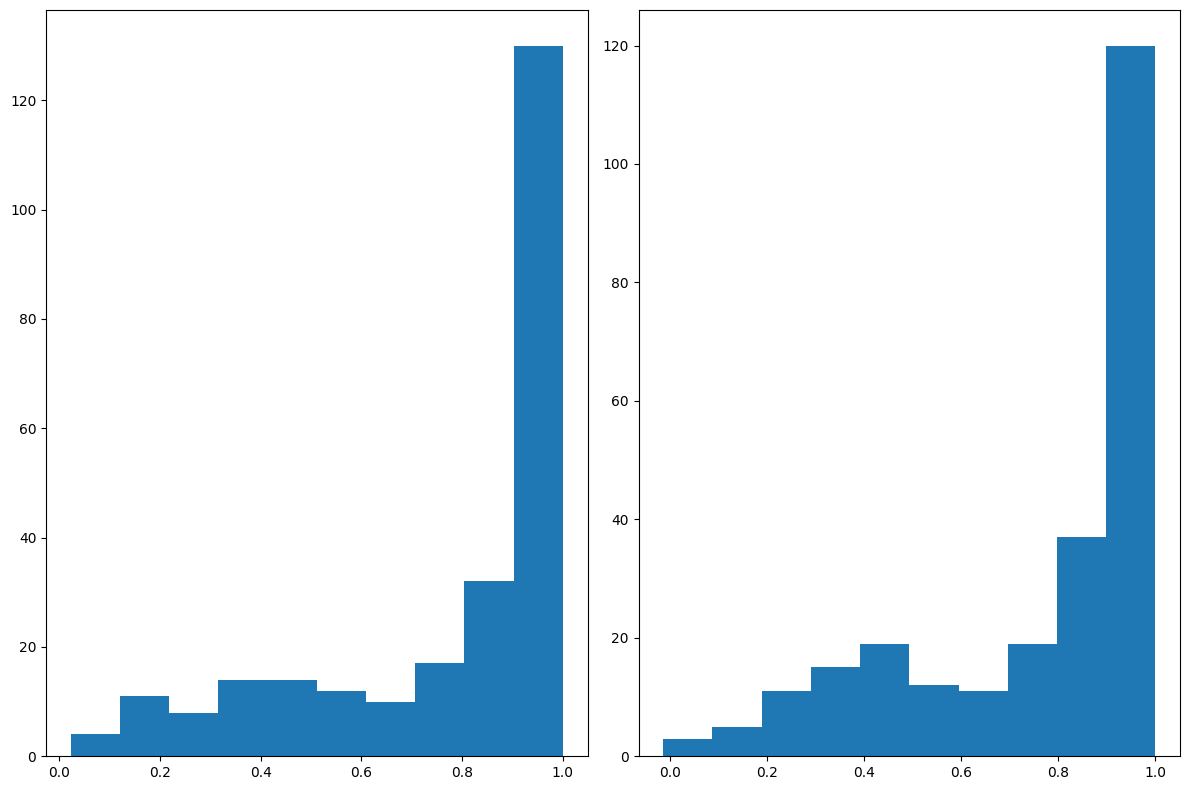

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.hist(np.array(correlations)[:,0].flatten())
plt.subplot(122)
plt.hist(np.array(correlations)[:,1].flatten())

plt.tight_layout()
plt.show()

In [ ]:
puntuaciones = []

for vano in data:

    try:
        puntuaciones.append(vano["PUNTUACIONES"])
        
    except Exception:
        pass

puntuaciones_df = pd.DataFrame(puntuaciones)

print((puntuaciones_df["Reconstrucción"] == "Posible").sum()/puntuaciones_df.shape[0])
print((puntuaciones_df["Error polilínea"] > puntuaciones_df["Error nuestro ajuste"]).sum()/puntuaciones_df.shape[0])
print((puntuaciones_df["Output"] == "good_fit").sum()/puntuaciones_df.shape[0])

0.96
0.84
0.84


In [ ]:
puntuaciones_df.describe().loc[["mean", "std", "max", "std"],:]

,Error polilínea,Error nuestro ajuste,Conductores identificados
mean,2.306916e+06,1.193859,3.520833
std,1.782017e+06,0.650203,1.685724
max,4.694515e+06,2.743084,7.000000
std,1.782017e+06,0.650203,1.685724


,Reconstrucción,Flag,Error polilínea,Error nuestro ajuste,Continuidad,Conductores identificados,Output
0,Posible,Tiene 3 o más conductores. Porcentaje de hueco...,39.932749,45.434766,full,3,good_fit


In [ ]:
res.loc[res.flag=='empty',:].shape

(1, 3)

In [ ]:
res.loc[res.flag=='bad_cluster',:].shape

(11, 3)

In [ ]:
res.loc[res.flag=='bad_backing',:]

,id,flag,line_number
13,G_13576748_13576812,bad_backing,0


In [ ]:
res.loc[res.flag=='good_fit',:].shape

(0, 3)

In [ ]:
from catenaria.notebooks.old_modules.modules_fit import *
import json
import os

pathdata2 = os.getcwd()+"/../data/lineas_completas/REG804.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)
    
fulld=[data[i]['ID_VANO'] for i in range(len(data))]
res=fit_plot_vano_group(data,sublist=fulld,plot_filter='good_fit',init=0,end=len(fulld),save=True,label='REG')#len(fulld)

ModuleNotFoundError: No module named 'plotly'

In [ ]:
res.flag.value_counts()

flag
bad_cluster        87
bad_line_number    43
good_fit            9
empty               9
bad_backing         7
Name: count, dtype: int64

In [ ]:
res

NameError: name 'res' is not defined

In [ ]:
from catenaria.notebooks.old_modules.modules_fit import *
import json
import os

pathdata2 = os.getcwd()+"/../data/lineas_completas/XIN803.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)
    

fulld=[data[i]['ID_VANO'] for i in range(len(data))]
res=fit_plot_vano_group(data,sublist=fulld,plot_filter=None,init=0,end=len(fulld),save=True,label='XIN')#len(fulld)
#'bad_line_number', "bad_backing", bad_cluster, bad_line_number, bad_line_orientation, bad_fit, good_fit, 


Processing Vano 0

Reference G_13645821_13645987
Umbral de corte superior detectado: 851254.4582811123
Number of lines: 3
(8040,)
[0 1 2]
(3,)

Processing Vano 1

Reference G_13645776_13645990
Umbral de corte inferior detectado: 4359432.5516279405
Umbral de corte superior detectado: 4359553.768260339
Number of lines: 3
(8546,)
[0 1 2]
(3,)

Processing Vano 2

Reference G_13645684_13645777
Umbral de corte inferior detectado: 251440.5701692517
Umbral de corte superior detectado: 251528.8044695908
Number of lines: 3
(5596,)
[0 1 2]
(3,)

Processing Vano 3

Reference G_13615863_13645824
Umbral de corte inferior detectado: -1043461.5826490528
Umbral de corte superior detectado: -1043410.1842453678
Number of lines: 3
(2878,)
[0 1 2]
(3,)

Processing Vano 4

Reference G_13645732_13645823
Umbral de corte inferior detectado: -1102312.024197021
Umbral de corte superior detectado: -1102159.7647004905
Number of lines: 3
(5945,)
[0 1 2]
(3,)

Processing Vano 5

Reference G_13499432_13645947
Umbral

/home/ubuntu-deduce/Projects/electra-ia/catenaria/notebooks/modules_fit.py:1102: RuntimeWarning: overflow encountered in cosh
  r=a * np.cosh((x - h) / a) + k


Number of lines: 3
(7305,)
[0 1 2]
(3,)

Processing Vano 81

Reference G_13597802_13645695
Umbral de corte inferior detectado: -4608989.422519232
Umbral de corte superior detectado: -4608786.053238494
Number of lines: 3
(6673,)
[0 1 2]
(3,)

Processing Vano 82

Reference G_13645789_13645916
Umbral de corte inferior detectado: -4609443.617692309
Umbral de corte superior detectado: -4609292.996995143
Number of lines: 3
(6045,)
[0 1 2]
(3,)

Processing Vano 83

Reference G_13645645_13645961
Umbral de corte superior detectado: 2332713.1473456793
Number of lines: 3
(7084,)
[0 1 2]
(3,)

Processing Vano 84

Reference G_13645844_13645845
Umbral de corte inferior detectado: -3638207.696426026
Umbral de corte superior detectado: -3638057.507208752
Number of lines: 3
(7277,)
[0 1 2]
(3,)

Processing Vano 85

Reference G_13645799_13645970
Umbral de corte inferior detectado: -4116335.2849874254
Umbral de corte superior detectado: -4116117.9422650244
Number of lines: 3
(7738,)
[0 1 2]
(3,)

Process

In [ ]:
from catenaria.notebooks.old_modules.modules_fit import *
import json
import os

pathdata2 = os.getcwd()+"/../data/lineas_completas/VDI711.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)
    

fulld=[data[i]['ID_VANO'] for i in range(len(data))]
res=fit_plot_vano_group(data,sublist=fulld,plot_filter=None,init=0,end=len(fulld),save=True,label='VDI')#len(fulld)
#'bad_line_number', "bad_backing", bad_cluster, bad_line_number, bad_line_orientation, bad_fit, good_fit, 


Processing Vano 0

Reference C_13411888_13411889
Umbral de corte superior detectado: 2617144.872676384
Number of lines: 3

Processing Vano 1

Reference C_13412048_13412052
Umbral de corte inferior detectado: -3852391.868572913
Umbral de corte superior detectado: -3852312.239312542
Number of lines: 3

Processing Vano 2

Reference C_13412143_13412146
Umbral de corte superior detectado: 3910548.1512978827
Number of lines: 3

Processing Vano 3

Reference C_13412119_13412124
Umbral de corte inferior detectado: 3906191.4814983476
Umbral de corte superior detectado: 3906279.7072119163
Number of lines: 3

Processing Vano 4

Reference C_13412096_13412097
Umbral de corte inferior detectado: 3915462.50963112
Umbral de corte superior detectado: 3915544.4794009104
Number of lines: 3

Processing Vano 5

Reference C_13412120_13412145
Umbral de corte inferior detectado: 3919803.6859338717
Umbral de corte superior detectado: 3919897.814413377
Number of lines: 3

Processing Vano 6

Reference C_13412145

Recogida de ajustes y eliminación de outliers en parámetros

In [ ]:
import os
import json 
import numpy as np

pathdata2 = os.getcwd()+'/'+[el for el in os.listdir(os.getcwd()) if 'REG_resultado' in el][0]

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)

df_reg=data_catenaryparameters_to_df(data)


pathdata2 = os.getcwd()+'/'+[el for el in os.listdir(os.getcwd()) if 'VDI_resultado' in el][0]

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)

df_vdi=data_catenaryparameters_to_df(data)


pathdata2 = os.getcwd()+'/'+[el for el in os.listdir(os.getcwd()) if 'XIN_resultado' in el][0]

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)

df_xin=data_catenaryparameters_to_df(data)

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1


In [ ]:
df_reg.shape

(155, 4)

In [ ]:
df_vdi.shape

(129, 4)

In [ ]:
df_xin.shape

(163, 4)

In [ ]:
df_reg=df_reg.dropna()
df_reg=df_reg.loc[df_reg['id'].isin(reg.to_list())]
df_vdi=df_vdi.dropna()
df_vdi=df_vdi.loc[df_vdi['id'].isin(vdi.to_list())]
df_xin=df_xin.dropna()
df_xin=df_xin.loc[df_xin['id'].isin(xin.to_list())]

In [ ]:
df_reg.shape

(65, 4)

In [ ]:
df_vdi.shape

(86, 5)

In [ ]:
df_xin.shape

(121, 4)

In [ ]:
df_reg=pretreatment_linegroup_from_json(df_reg)
df_vdi=pretreatment_linegroup_from_json(df_vdi)
df_xin=pretreatment_linegroup_from_json(df_xin)

In [ ]:
df_reg.shape

(45, 5)

In [ ]:
df_vdi.shape

(86, 5)

In [ ]:
df_xin.shape

(103, 5)